In [1]:
import pandas as pd
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from pylab import rcParams

df = pd.read_csv("C:\\Users\\stefa\\Desktop\\dsLab\\progetto_finale\\berakbyHour\\italia8mattina.csv")
dates = pd.read_csv("C:\\Users\\stefa\\Desktop\\dsLab\\progetto_finale\\berakbyHour\\date.csv")
df["Date"]=dates["date"]
df = df[["TSTOT.ConsumiITA","Date"]]
df.columns = ['Consumo', 'Date']
df = df.append({'Consumo':37952.91,'Date':'2012-02-29'}, ignore_index = True)
df = df.sort_values(by=['Date']).reindex()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)

rcParams['figure.figsize'] = 18, 8
df['Consumo'].dropna().plot()

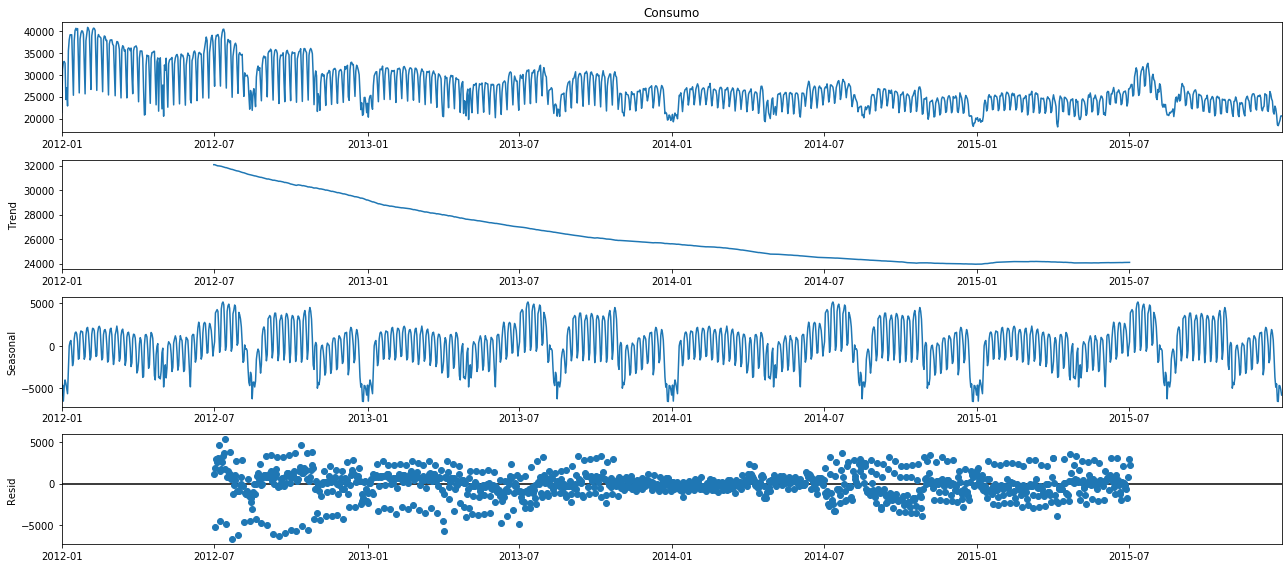

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(df["Consumo"].dropna(),freq=365, model='additive')
fig = decomposition.plot()
plt.show()

In [3]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(df['Consumo'])

Results of Dickey-Fuller Test:
Test Statistic                   -2.874428
p-value                           0.048404
#Lags Used                       23.000000
Number of Observations Used    1437.000000
Critical Value (1%)              -3.434909
Critical Value (5%)              -2.863553
Critical Value (10%)             -2.567842
dtype: float64


In [4]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
kpss_test(df['Consumo'])

Results of KPSS Test:
Test Statistic            4.171875
p-value                   0.010000
Lags Used                24.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\stefa\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


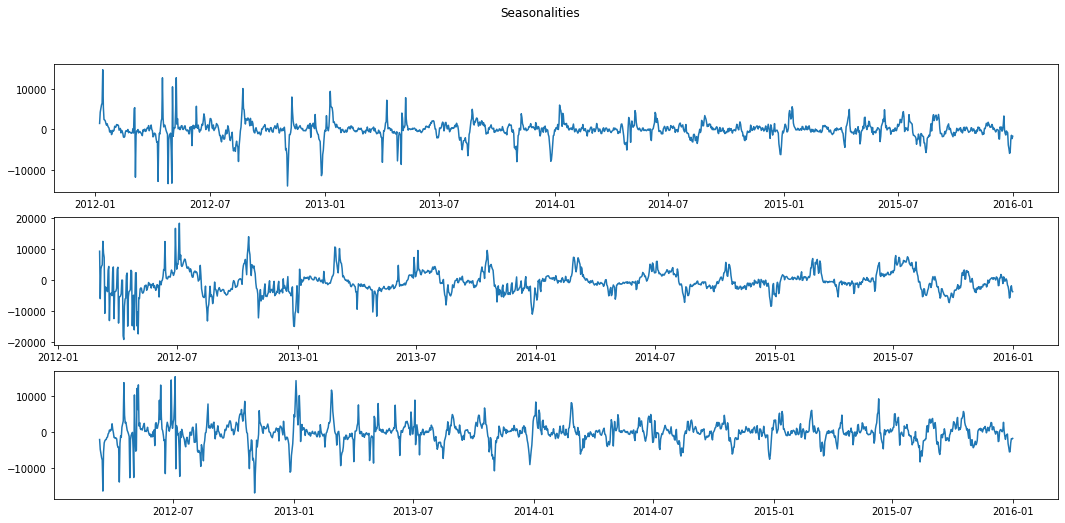

In [5]:
df['Consumo_diff'] =   df['Consumo'] - df['Consumo'].shift(7)
df['Consumo_diff_2'] = df['Consumo'] - df['Consumo'].shift(63)
df['Consumo_diff_tot'] =   df['Consumo_diff'] - df['Consumo_diff'].shift(63)

fig, axs = plt.subplots(3)
fig.suptitle('Seasonalities')
axs[0].plot(df['Consumo_diff'].dropna())
axs[1].plot(df['Consumo_diff_2'].dropna())
axs[2].plot(df['Consumo_diff_tot'].dropna())

#del df['Consumo_diff']

In [6]:
null_counts = df.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

Consumo_diff_tot    70
Consumo_diff_2      63
Consumo_diff         7
dtype: int64

In [7]:
df = df['Consumo'].resample('D').mean()
df_train = df[:len(df)-7]

In [143]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC:33814.23432084926
ARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC:32605.795354319234
ARIMA(0, 0, 0)x(0, 1, 0, 7) - AIC:26262.857134382793
ARIMA(0, 0, 0)x(0, 1, 1, 7) - AIC:26043.16910606186
ARIMA(0, 0, 0)x(1, 0, 0, 7) - AIC:26278.5534041171
ARIMA(0, 0, 0)x(1, 0, 1, 7) - AIC:26261.680166962455
ARIMA(0, 0, 0)x(1, 1, 0, 7) - AIC:26066.08036763198
ARIMA(0, 0, 0)x(1, 1, 1, 7) - AIC:25912.594166079893
ARIMA(0, 0, 1)x(0, 0, 0, 7) - AIC:32727.011020560014
ARIMA(0, 0, 1)x(0, 0, 1, 7) - AIC:32327.090662669165
ARIMA(0, 0, 1)x(0, 1, 0, 7) - AIC:25714.407504633542
ARIMA(0, 0, 1)x(0, 1, 1, 7) - AIC:25418.261480498106
ARIMA(0, 0, 1)x(1, 0, 0, 7) - AIC:25771.362768464307
ARIMA(0, 0, 1)x(1, 0, 1, 7) - AIC:25731.546978001345
ARIMA(0, 0, 1)x(1, 1, 0, 7) - AIC:25470.885595369346
ARIMA(0, 0, 1)x(1, 1, 1, 7) - AIC:25351.266894817858
ARIMA(0, 1, 0)x(0, 0, 0, 7) - AIC:27365.339277071478
ARIMA(0, 1, 0)x(0, 0, 1, 7) - AIC:26575.79958820682
ARIMA(0, 1, 0)x(0, 1, 0, 7) - AIC:25699.366081393644

In [12]:
mod = sm.tsa.statespace.SARIMAX(df_train,
                                order=(1, 0, 1),
                                seasonal_order=(0, 1, 1, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print("AIC:" + str(results.aic))
print(results.summary().tables[1])

AIC:24934.63105354317
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8467      0.012     69.799      0.000       0.823       0.870
ma.L1         -0.2221      0.017    -12.895      0.000      -0.256      -0.188
ma.S.L7       -0.5293      0.008    -67.524      0.000      -0.545      -0.514
sigma2      1.956e+06   1.85e+04    105.500      0.000    1.92e+06    1.99e+06


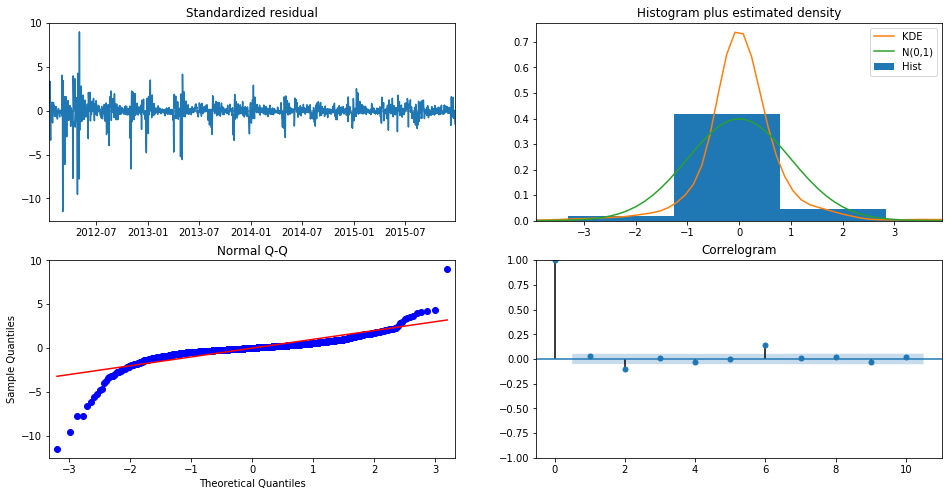

In [13]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

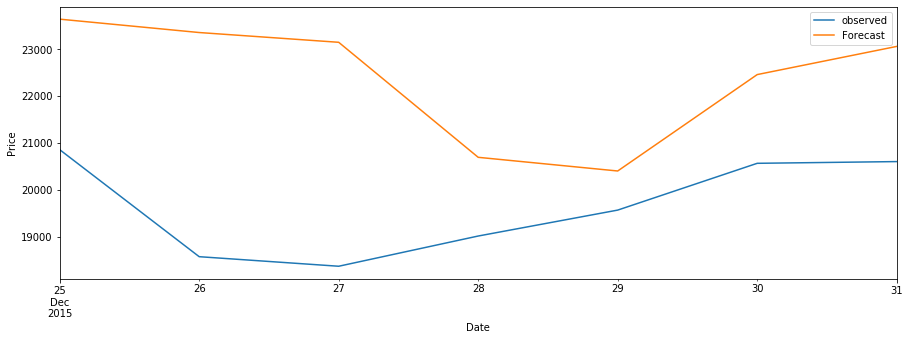

In [14]:
pred_uc = results.get_forecast(steps=7)
pred_ci = pred_uc.conf_int()

ax = df['2015-12-25':].plot(label='observed', figsize=(15, 5))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()

In [15]:
y_truth = df['2015-12-25':]

In [16]:
pred_uc.predicted_mean

2015-12-25    23642.361978
2015-12-26    23356.701625
2015-12-27    23148.310700
2015-12-28    20692.535677
2015-12-29    20400.633914
2015-12-30    22458.919102
2015-12-31    23060.186519
Freq: D, dtype: float64

In [17]:
mse = ((pred_uc.predicted_mean - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 9526309.32


In [18]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 3086.47
